# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# create empty lists to store data for dataframe
city_list = []
latitude = []
longitude = []
temp = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

In [4]:
#create query url for loop
units = 'imperial'
query_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='

In [5]:
print('Beginning Data Retrieval')
print('-----------------------------')

#create query url for loop
query_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='

# loop through cities to collect currect weather data
for city in cities:
    # Create search query, make request and store in json
    response_json = requests.get(query_url + city).json()
    
    # attempt to grab weather data from the cities
    try:
        latitude.append(response_json['coord']['lat'])
        longitude.append(response_json['coord']['lon'])
        temp.append(response_json['main']['temp'])
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        city_list.append(city)
        #mass.append(response_json['results'][0]['mass'])
        print(f'Processing Record {cities.index(city)}| {city}')
        
    # exceptions for a cities not found or errors
    except:
        print(f'{city} not found. Skipping.')
        pass

Beginning Data Retrieval
-----------------------------
Processing Record 0| longyearbyen
Processing Record 1| atuona
Processing Record 2| avarua
Processing Record 3| eureka
tumannyy not found. Skipping.
Processing Record 5| severo-kurilsk
Processing Record 6| sioux lookout
Processing Record 7| sitka
tapaua not found. Skipping.
Processing Record 9| airai
Processing Record 10| klaksvik
Processing Record 11| pisco
Processing Record 12| port alfred
Processing Record 13| manacapuru
Processing Record 14| tasiilaq
Processing Record 15| kapaa
Processing Record 16| nieuw amsterdam
Processing Record 17| punta arenas
Processing Record 18| bubaque
Processing Record 19| bathsheba
Processing Record 20| lompoc
Processing Record 21| pevek
Processing Record 22| butaritari
Processing Record 23| saint-philippe
belushya guba not found. Skipping.
Processing Record 25| saskylakh
Processing Record 26| greymouth
Processing Record 27| busselton
Processing Record 28| kodiak
Processing Record 29| dali
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create DataFrame
weather_data = pd.DataFrame({
    'City': city_list,
    'Latitude': latitude,
    'Longitude': longitude,
    'Temperature (F)': temp,
    'Max Temp (F)': max_temp,
    'Humidity (%)': humidity,
    'Cloudiness (%)': cloudiness,
    'Wind Speed (mph)': wind_speed
})

#set the city to the index and display
weather_data = weather_data.set_index('City')
weather_data.head(10)

,Latitude,Longitude,Temperature (F),Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
City,,,,,,,
longyearbyen,78.2186,15.6401,44.44,44.44,87,0,6.91
atuona,-9.8000,-139.0333,77.81,77.81,70,14,21.65
avarua,-21.2078,-159.7750,80.65,80.65,74,2,4.61
eureka,40.8021,-124.1637,63.59,63.93,72,29,5.01
severo-kurilsk,50.6789,156.1250,56.59,56.59,72,1,5.73
sioux lookout,50.1001,-91.9170,77.36,77.36,36,48,14.52
sitka,57.0531,-135.3300,58.89,58.89,77,90,11.50
airai,-8.9266,125.4092,61.38,61.38,76,73,3.13
klaksvik,62.2266,-6.5890,49.12,49.12,86,98,4.23


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
clean_weather_data = weather_data.loc[(weather_data['Humidity (%)'] < 100),:]

#export clean data to csv
clean_weather_data.to_csv('../Output/clean_weather_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

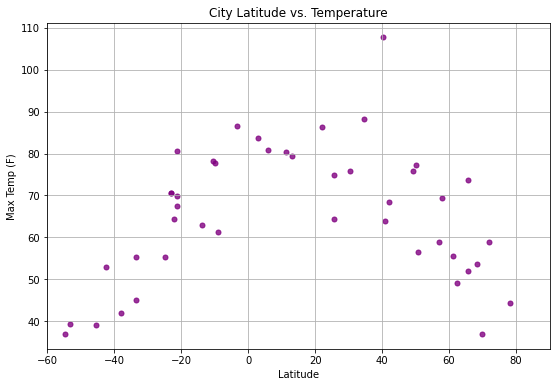

In [8]:
clean_weather_data.plot(kind='scatter', x='Latitude', y='Max Temp (F)', grid=True, figsize=(9,6),
              title='City Latitude vs. Temperature', s=25, alpha=0.8, xlim=(-60,90),color='purple')

plt.savefig('../Output/lat_v_temp', pad_inches=0.1, facecolor='w')
#plt.show()

## Latitude vs. Humidity Plot

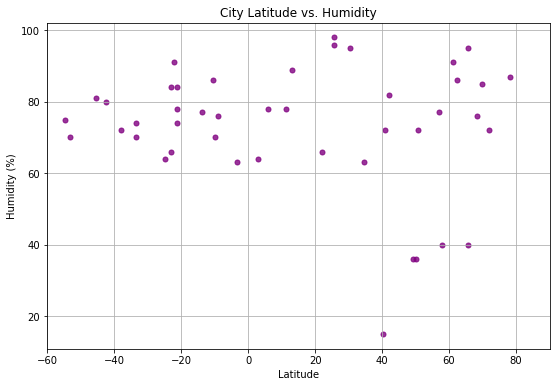

In [9]:
clean_weather_data.plot(kind='scatter', x='Latitude', y='Humidity (%)', grid=True, figsize=(9,6),
              title='City Latitude vs. Humidity', s=25, alpha=0.8, xlim=(-60,90), color='purple')

plt.savefig('../Output/lat_v_humidity', pad_inches=0.1, facecolor='w')
#plt.show()

## Latitude vs. Cloudiness Plot

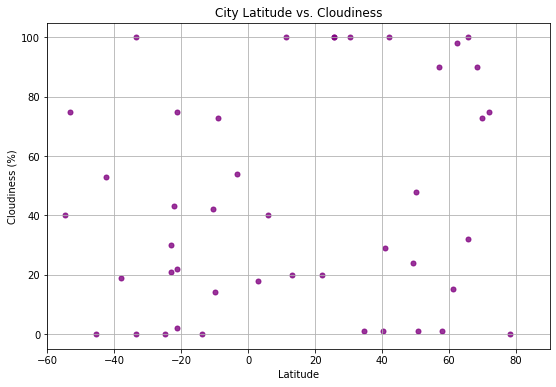

In [10]:
clean_weather_data.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', grid=True, figsize=(9,6),
              title='City Latitude vs. Cloudiness', s=25, alpha=0.8, xlim=(-60,90), color='purple')

plt.savefig('../Output/lat_v_clouds', pad_inches=0.1, facecolor='w')
#plt.show()

## Latitude vs. Wind Speed Plot

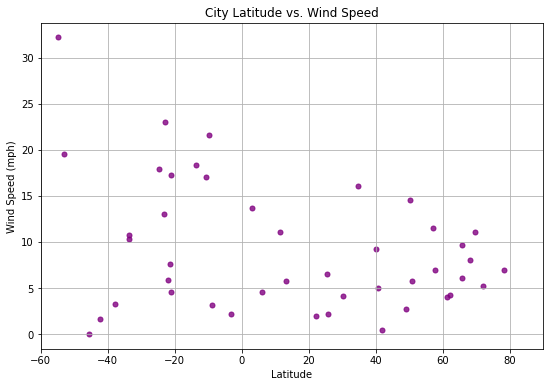

In [11]:
clean_weather_data.plot(kind='scatter', x='Latitude', y='Wind Speed (mph)', grid=True, figsize=(9,6),
              title='City Latitude vs. Wind Speed', s=25, alpha=0.8, xlim=(-60,90),color='purple')

plt.savefig('../Output/lat_v_wind', pad_inches=0.1, facecolor='w')
#plt.show()

## Linear Regression

In [12]:
#create dataframes for Northen and Southern Hemispheres
n_hemi = clean_weather_data.loc[(clean_weather_data['Latitude'] > 0),:]
s_hemi = clean_weather_data.loc[(clean_weather_data['Latitude'] < 0),:]


In [38]:
# create a function for create the scatter plot
def quick_scatter(x_series, y_series, region):
    #plot scatter
    y_label = y_series.name
    plt.scatter(x_series,y_series)
    plt.xlabel('Latitude')
    plt.ylabel(y_series.name)
    plt.title(f'{y_series.name} v.s Latitude in the {region}ern Hemisphere')
    #gather regression data
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_series, y_series)
    regress_values = x_series * slope + intercept
    plt.plot(x_series,regress_values,color="red")
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.show()
    print(f'line of best fit: {line_eq}.')
    print(f'correlation: {rvalue}')
    print('-----------------------------')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

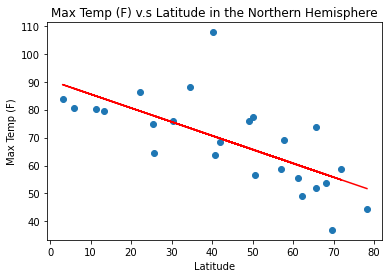

line of best fit: y = -0.5x +90.49.
correlation: -0.688479252873856


In [39]:
quick_scatter(n_hemi['Latitude'],n_hemi['Max Temp (F)'], 'North')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

line of best fit: y = 0.9x +84.68.
correlation: 0.8769106422791155


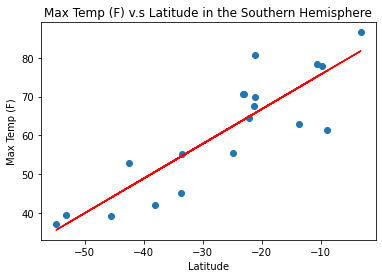

In [35]:
quick_scatter(s_hemi['Latitude'],s_hemi['Max Temp (F)'], 'South')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

line of best fit: y = -0.08x +74.89.
correlation: -0.0755670383393675


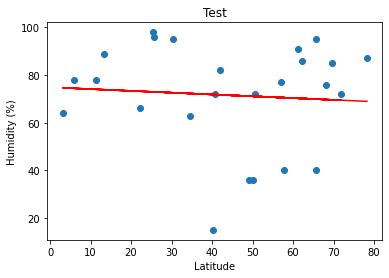

In [16]:
quick_scatter(n_hemi['Latitude'],n_hemi['Humidity (%)'], 'North')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

line of best fit: y = -0.0x +75.41.
correlation: -0.00843311829753996


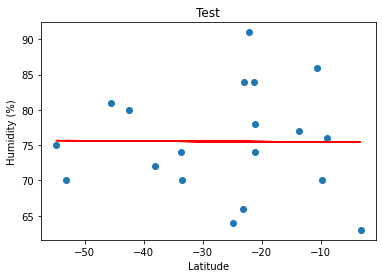

In [17]:
quick_scatter(s_hemi['Latitude'],s_hemi['Humidity (%)'], 'South')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

line of best fit: y = 0.05x +48.79.
correlation: 0.028026029103341128


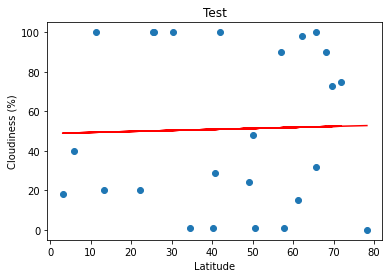

In [18]:
quick_scatter(n_hemi['Latitude'],n_hemi['Cloudiness (%)'], 'North')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

line of best fit: y = -0.14x +31.24.
correlation: -0.06754770934501743


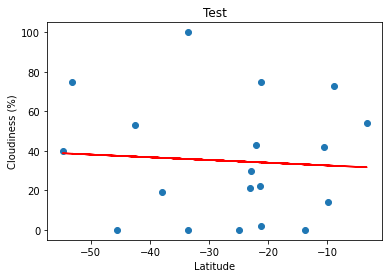

In [19]:
quick_scatter(s_hemi['Latitude'],s_hemi['Cloudiness (%)'], 'South')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

line of best fit: y = -0.0x +7.16.
correlation: -0.008321713317631466


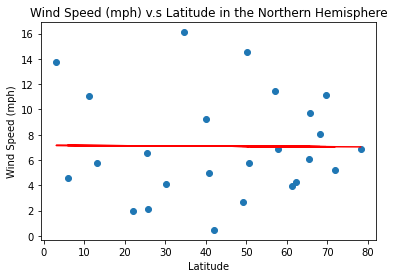

In [36]:
quick_scatter(n_hemi['Latitude'],n_hemi['Wind Speed (mph)'], 'North')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

line of best fit: y = -0.08x +9.92.
correlation: -0.13669756152549403


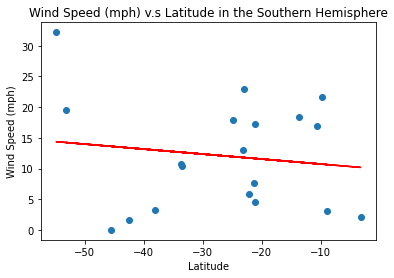

In [37]:
quick_scatter(s_hemi['Latitude'],s_hemi['Wind Speed (mph)'], 'South')